In [1]:
import os
from pathlib import Path

import lowmapper as lm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import time
import yaml

In [2]:
start_time = time.time()

print('Loading config...')
config_path = 'cfg/default.yaml'
config = lm.parse_yaml(config_path)
lm.display_config(config)

print(f'Time elapsed: {time.time() - start_time:.2f}s')

Loading config...
config: path=examples/Sonar_2023-09-12_09.04.57.sl2, save_path=runs, transducer_x_offset=0,0, transducer_y_offset=0,0, egn=True, egn_strength=None, egn_stretch_factor=0.5, wcp=True, wcr=False, son_tile_format=png, export_speed_corrected=False, speed_correction=0, shadow_removal=0, depth_detection_method=0, smooth_depth=0, adjust_depth=0, plot_bedpicks=0, pixel_res=1, export_georef_sidescan=gtiff, export_sidescan_substrates_map=True, sidescan_wcp=True, sidescan_wcr=False, colormap=hotdog, map_substrate=False, subtrate_plots=False, substrate_raster=False, substrate_polygon=False, classification_method=max, 
Time elapsed: 0.00s


In [3]:
start_time = time.time()

print('\nReading sonar data...')
sonar = lm.Sonar(config['path'])
filename_as_folder = Path(config['path']).stem

print(f'Time elapsed: {time.time() - start_time:.2f}s')


Reading sonar data...
Time elapsed: 0.23s


In [4]:
start_time = time.time()

# Exporter
print('\nExporting data...')
exporter = lm.Exporter(sonar, project_name=filename_as_folder)
exporter.export_data_to_csv()
exporter.export_all_images()
exporter.export_georeferenced_sidescan()

print(f'Time elapsed: {time.time() - start_time:.2f}s')


Exporting data...
Time elapsed: 3.74s


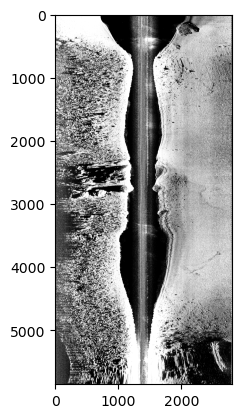

In [5]:
side_scan_image = sonar.image("sidescan")
side_scan = lm.SideScan(side_scan_image)

side_scan.apply_egn()

stretched = side_scan.apply_percentile_clip(25, 75)
plt.imshow(stretched, cmap='gray')